In [21]:
import dwavebinarycsp
from dwave.system import DWaveSampler, EmbeddingComposite
import networkx as nx
import matplotlib.pyplot as plt
import dwave.inspector

# Represent the map as the nodes and edges of a graph
provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE', 'QC', 'SK', 'YT']
neighbors = [('AB', 'BC'), ('AB', 'NT'), ('AB', 'SK'), ('BC', 'NT'), ('BC', 'YT'), ('MB', 'NU'),
             ('MB', 'ON'), ('MB', 'SK'), ('NB', 'NS'), ('NB', 'QC'), ('NL', 'QC'), ('NT', 'NU'),
             ('NT', 'SK'), ('NT', 'YT'), ('ON', 'QC')]

# Function for the constraint that two nodes with a shared edge not both select one color
def not_both_1(v, u):
    return not (v and u)

# Function that plots a returned sample
def plot_map(sample):
    G = nx.Graph()
    G.add_nodes_from(provinces)
    G.add_edges_from(neighbors)
    # Translate from binary to integer color representation
    color_map = {}
    for province in provinces:
          for i in range(colors):
            if sample[province+str(i)]:
                color_map[province] = i
    # Plot the sample with color-coded nodes
    node_colors = [color_map.get(node) for node in G.nodes()]
    nx.draw_circular(G, with_labels=True, node_color=node_colors, node_size=3000, cmap=plt.cm.rainbow)
    plt.show()

# Valid configurations for the constraint that each node select a single color
one_color_configurations = {(0, 0, 0, 1), (0, 0, 1, 0), (0, 1, 0, 0), (1, 0, 0, 0)}
colors = len(one_color_configurations)

In [22]:
# Create a binary constraint satisfaction problem
csp = dwavebinarycsp.ConstraintSatisfactionProblem(dwavebinarycsp.BINARY)

In [23]:
# Add constraint that each node (province) select a single color
for province in provinces:
    variables = [province+str(i) for i in range(colors)]
    csp.add_constraint(one_color_configurations, variables)

# Add constraint that each pair of nodes with a shared edge not both select one color
for neighbor in neighbors:
    v, u = neighbor
    for i in range(colors):
        variables = [v+str(i), u+str(i)]
        csp.add_constraint(not_both_1, variables)

In [24]:
# Convert the binary constraint satisfaction problem to a binary quadratic model
bqm = dwavebinarycsp.stitch(csp)

In [29]:
# Set up a solver using the local system’s default D-Wave Cloud Client configuration file
# and sample 1000 times
sampler = EmbeddingComposite(DWaveSampler())
sampleset = sampler.sample(bqm, num_reads=1000)

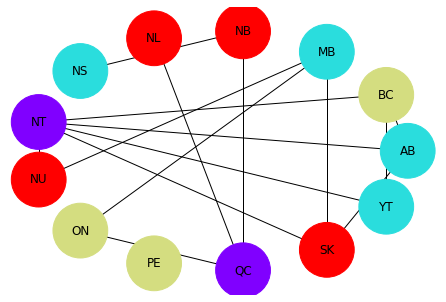

In [30]:
# Plot the lowest-energy sample if it meets the constraints
sample = sampleset.first.sample
if not csp.check(sample):
    print("Failed to color map")
else:
    plot_map(sample)

In [31]:
dwave.inspector.show(sampleset)

/usr/local/lib/python3.7/site-packages/websocket/_http.py:165: ResourceWarning: unclosed <socket.socket fd=102, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=6, laddr=('::', 44038, 0, 0)>
  sock = socket.socket(family, socktype, proto)


'http://127.0.0.1:18000/?problemId=9de707d3-66a8-4772-be2e-a21a018b1079'